# J2– Statistiques

## Bootstrapping, inference, intervalles de confiance

### Exercise 3 – Old Faithful (***)

Old Faithful  est un geyser du Yellowstone National Park dans le Wyoming: http://en.wikipedia.org/wiki/Old_Faithful.

Le dataset  `old_faithful.csv` donne la durée de 272 eruptions consécutives. La colonne `eruptions` représente la durée des eruptions en minutes, et la colonne `waiting` représente les durée en minutes jusqu'à la prochaine éruption.

On veut estimer la durée **mediane** d'une eruption et donner un interval de confiance de 90% pour la mediane.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

**1. Importer les données et convertir la durée des éruptions en secondes.**

In [4]:
df= pd.read_csv('old_faithful.csv')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [5]:
df.shape

(272, 2)

In [9]:
df.columns

Index(['eruptions', 'waiting'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


**2. Tracer un histogramme de la durée des éruptions.**

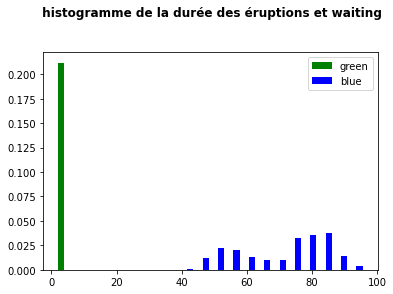

In [29]:
import matplotlib.pyplot as plt 
n_bins = 20
colors = ['green', 'blue']
plt.hist(df, n_bins, density = True,
         histtype ='bar',
         color = colors,
         label = colors)

plt.legend(prop ={'size': 10})
 
plt.title(' histogramme de la durée des éruptions et waiting\n\n',
          fontweight = "bold")

plt.show()

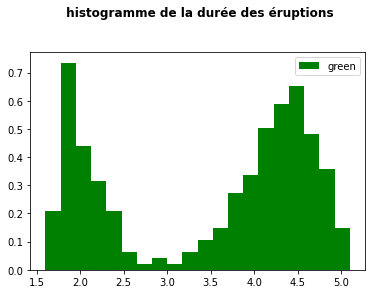

In [25]:
n_bins = 20
colors = ['green']
plt.hist(df.eruptions, n_bins, density = True,
         histtype ='bar',
         color = colors,
         label = colors)

plt.legend(prop ={'size': 10})
 
plt.title(' histogramme de la durée des éruptions\n\n',
          fontweight = "bold")

plt.show()

**3. Calculer la mediane de l'échantillon (durée des éruptions).**

In [32]:
print("la mediane de l'échantillon (durée des éruptions) est:", df.eruptions.median())

la mediane de l'échantillon (durée des éruptions) est: 4.0


**4. Trouver la médiane d'un échantillon bootstrappé. Répeter l'opération 1000 fois et stocker 1000 médianes bootstrappées.**

**5. Tracer un histogramme de la distribution bootstrappée Plot the bootstrap distribution as a histogram.**

_Hint: convertissez l'array en Series pour utiliser `.plot()`._

**6. Trouver les valeurs critiques .95 et .05 (le 5ème et 95ème centile).**

**[BONUS] 7. Ecrire une fonction qui fais l'ensemble de toutes les opérations précédentes.**

_Hint: la fonction doit prendre en entrée l'échantillon, le type d'estimateur ('median', 'mean' suffisent) et ressortir l'intervalle de confiance bootstrappé._

**[BONUS] 8. Calculer les correlation entre la durée des eruptions et le temps d'attente entre chaque éruption. En suite construire un intervalle de confiance bootstrappé pour le coefficient de correlation.**

**[BONUS] 9. Aller plus loin**
Une autre technique de bootstrap est l'utilisation de la distribution des différence des médianes plutôt que la distribution boostrapée directement
Voir le [MIT course](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf) pour plus de détails.

* Tout d'abord, calculer la différence entre la mediane originale du sample et la médiane bootstrappée.
* En suite, tracer un histogramme de la distribution de ces différences.
* Trouver les valeurs critiques .95 and .05.

>Grâce à la loi des Grands Nombres, ces valeurs représentent une bonne estimation de jusqu'à où la mediane boostrappée peut varié de la mediane de l'échantillon avec 90% de certitude. Le principe du boostrap dis que ces variations devraient apprximer les variations de la médiane de l'échantillon par rapport à la médiane de la population .

* Enfin, utilisez ces valeurs pour construire un bootstrap de 90% d'intervalle de confiance par rapport à la médiane de l'échantillon.

**[BONUS] 10. Quelle est la probabilité que la médiant d'un échantillon soit strictement plus que 10 secondes plus loin que la vraie médiane.**

_Hint:  Il faut obtenir la valeur absolue des differences du bootstrape, les classer par ordre croissant et en suite calculer la proportion de celles qui sont >10. Grâce à la loi des Grands Nombres, cela donne le pourcentage de chance que les médianes bootstrappées aient un écart strictement plus grands que 10 secondes de la médiane de l'échantillon. Le principe du bootstrape est une bonne approximation de la variation entre la médiane de l'échantillon et la médiane réelle._